# WeatherPy

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [92]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#setting random.seed for reproducible results
np.random.seed(42)

# Print the city count to confirm sufficient count
len(cities)

597

In [93]:
#generating a sample of cities for testing the code
#after the code is tested, these line will be seen as comments
#subset_cities = cities[:50]

#subset_cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [94]:
#saving the configuration information
#saving the base url
url = "http://api.openweathermap.org/data/2.5/weather?"

#setting our units to imperial for Fahrenheit (temperature) and mph (wind speed)
units = "imperial"

#building the query url
url2 = f"{url}appid={weather_api_key}&units={units}&q="


In [96]:
#retrieving requested data through iterative calls

#creating list for the cities to store data into
places = []

#creating loop to obtain requested weather information
#use subset_cities when testing the data
#use cities when using the full cities list
for city in cities:
    #building query url 
    query_url= url2 + city
    response = requests.get(query_url).json()

    #try to grab the following information, if available
    try:
        latitude=response["coord"]["lat"]
        longitude=response["coord"]["lon"]
        temp=response["main"]["temp"]
        max_temp=response["main"]["temp_max"]
        humidity=response["main"]["humidity"]
        cloud=response["clouds"]["all"]
        wind=response["wind"]["speed"]
        country=response["sys"]["country"]
        date=response["dt"]
        places.append({'City' : city, 
                       'Country' : country,
                        'Latitude' : latitude,
                        'Longitude' : longitude,
                        'Temperature (F)' : temp,
                        'Max Temp (F)' : max_temp,
                        'Humidity %' : humidity,
                        'Cloudiness' : cloud,
                        'Wind Speed (mph)' : wind,
                        "Date" : date})
        print(f"{city} found! Appending relevant stats.")
        #limiting the number of API calls to 60 calls per minute, when using a large sample
        time.sleep(1)
    #including a condition for handling cities that do not exist
    except KeyError:
        print(f"City not found. Skipping...")
    

henties bay found! Appending relevant stats.
City not found. Skipping...
bethel found! Appending relevant stats.
saint-francois found! Appending relevant stats.
ushuaia found! Appending relevant stats.
mar del plata found! Appending relevant stats.
kruisfontein found! Appending relevant stats.
bronnoysund found! Appending relevant stats.
City not found. Skipping...
yumen found! Appending relevant stats.
albany found! Appending relevant stats.
dikson found! Appending relevant stats.
ossora found! Appending relevant stats.
vaini found! Appending relevant stats.
castro found! Appending relevant stats.
City not found. Skipping...
vanimo found! Appending relevant stats.
san cristobal found! Appending relevant stats.
ulladulla found! Appending relevant stats.
ewa beach found! Appending relevant stats.
bluff found! Appending relevant stats.
maldonado found! Appending relevant stats.
mataura found! Appending relevant stats.
jamestown found! Appending relevant stats.
geraldton found! Appending 

ixtapa found! Appending relevant stats.
fortuna found! Appending relevant stats.
sakakah found! Appending relevant stats.
follonica found! Appending relevant stats.
srandakan found! Appending relevant stats.
vao found! Appending relevant stats.
osypenko found! Appending relevant stats.
mayo found! Appending relevant stats.
saint george found! Appending relevant stats.
kokopo found! Appending relevant stats.
carutapera found! Appending relevant stats.
georgetown found! Appending relevant stats.
cidreira found! Appending relevant stats.
pemba found! Appending relevant stats.
poum found! Appending relevant stats.
paraiso found! Appending relevant stats.
mount isa found! Appending relevant stats.
abu dhabi found! Appending relevant stats.
valle del guamuez found! Appending relevant stats.
mirnyy found! Appending relevant stats.
houma found! Appending relevant stats.
City not found. Skipping...
kattivakkam found! Appending relevant stats.
City not found. Skipping...
sharjah found! Appending

iralaya found! Appending relevant stats.
ekhabi found! Appending relevant stats.
patacamaya found! Appending relevant stats.
kudat found! Appending relevant stats.
derbent found! Appending relevant stats.
City not found. Skipping...
santana found! Appending relevant stats.
iguape found! Appending relevant stats.
ahuimanu found! Appending relevant stats.
mayuge found! Appending relevant stats.
City not found. Skipping...
damaturu found! Appending relevant stats.
olinda found! Appending relevant stats.
el calvario found! Appending relevant stats.
sinazongwe found! Appending relevant stats.
sisimiut found! Appending relevant stats.
khipro found! Appending relevant stats.
maragogi found! Appending relevant stats.
nantucket found! Appending relevant stats.
yibin found! Appending relevant stats.
kaseda found! Appending relevant stats.
sept-iles found! Appending relevant stats.
hay river found! Appending relevant stats.
grindavik found! Appending relevant stats.
shimoda found! Appending relev

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [97]:
city_data_df = pd.DataFrame(places)

#viewing the dataframe
city_data_df.head(10)

,City,Country,Latitude,Longitude,Temperature (F),Max Temp (F),Humidity %,Cloudiness,Wind Speed (mph),Date
0,henties bay,NA,-22.1160,14.2845,69.85,69.85,80,7,7.25,1643132756
1,bethel,US,41.3712,-73.4140,37.83,40.24,71,100,4.00,1643132757
2,saint-francois,FR,46.4154,3.9054,33.24,36.68,93,0,1.14,1643132759
3,ushuaia,AR,-54.8000,-68.3000,42.46,44.22,75,100,29.93,1643132760
4,mar del plata,AR,-38.0023,-57.5575,74.88,82.42,92,75,18.99,1643132758
5,kruisfontein,ZA,-34.0033,24.7314,69.89,69.89,82,99,8.39,1643132763
6,bronnoysund,NO,65.4625,12.1997,35.60,35.60,75,75,16.11,1643132526
7,yumen,CN,40.2833,97.2000,17.78,17.78,42,0,2.91,1643132684
8,albany,US,42.6001,-73.9662,30.42,33.75,58,74,1.99,1643132617
9,dikson,RU,73.5069,80.5464,11.61,11.61,92,100,34.31,1643132676


In [98]:
#summary statistics
city_data_df.describe()

,Latitude,Longitude,Temperature (F),Max Temp (F),Humidity %,Cloudiness,Wind Speed (mph),Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,20.099162,17.257151,50.443125,51.170331,72.924632,60.193015,7.871287,1.643133e+09
std,33.145578,88.692192,32.522423,32.475122,21.477124,38.634156,6.537738,2.256531e+02
min,-54.800000,-179.166700,-43.110000,-43.110000,6.000000,0.000000,0.000000,1.643133e+09
25%,-6.908575,-60.897200,29.620000,31.952500,64.000000,20.000000,3.470000,1.643133e+09
50%,22.622500,17.954800,59.765000,61.260000,77.000000,75.000000,6.450000,1.643133e+09
75%,48.690550,99.472150,78.190000,78.490000,89.000000,99.000000,10.095000,1.643133e+09
max,78.218600,179.316700,107.200000,107.200000,100.000000,100.000000,50.640000,1.643133e+09


In [99]:
#writing city_Data_df to a csv
city_data_df.to_csv("output_data/cities_weather.csv",
                  encoding="utf-8", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
When this analysis was conducted, on January 25, 2022, there were no cities with humidity greater than 100 percent.

In [100]:
#checking for any cities with humidity greater than 100%
# obtaining the indices of cities that have humidity over 100%.
high_humid = city_data_df[city_data_df["Humidity %"] > 100].index
high_humid

Int64Index([], dtype='int64')

In [101]:
clean_city_data=city_data_df.drop(high_humid, inplace=False)

clean_city_data.head()

,City,Country,Latitude,Longitude,Temperature (F),Max Temp (F),Humidity %,Cloudiness,Wind Speed (mph),Date
0,henties bay,NA,-22.1160,14.2845,69.85,69.85,80,7,7.25,1643132756
1,bethel,US,41.3712,-73.4140,37.83,40.24,71,100,4.00,1643132757
2,saint-francois,FR,46.4154,3.9054,33.24,36.68,93,0,1.14,1643132759
3,ushuaia,AR,-54.8000,-68.3000,42.46,44.22,75,100,29.93,1643132760
4,mar del plata,AR,-38.0023,-57.5575,74.88,82.42,92,75,18.99,1643132758


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [102]:
from datetime import date

## Latitude vs. Temperature Plot

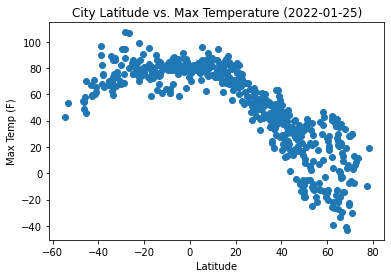

datetime.date(2022, 1, 25)

In [103]:
#creating a scatterplot
x_values = clean_city_data['Latitude']
y_values = clean_city_data['Temperature (F)']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
today = date.today()
plt.title(f'City Latitude vs. Max Temperature ({today})')

#saving the figure as a png
plt.savefig("images/LatvsTemp.png")

#showing the figure
plt.show()
today

Observations about Temperature: This plot shows the relation between latitude and the maximum temperature for the sampled cities. There appears to be a curvilinear relationship between latitude and maximum temperature. A finer-grained analysis of northern versus southern hemisphere could ellucidate clearer trends.

## Latitude vs. Humidity Plot

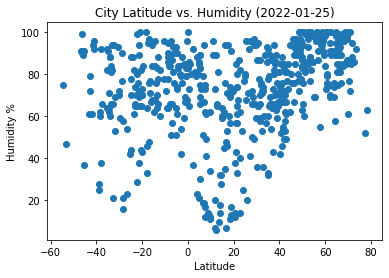

In [104]:
#creating a scatterplot for latitude versus humidity
x_values = clean_city_data['Latitude']
y_values = clean_city_data['Humidity %']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
today = date.today()
plt.title(f'City Latitude vs. Humidity ({today})')

#saving the figure as a png
plt.savefig("images/LatvsHumidity.png")

#showing the figure
plt.show()

Observations about Humidity: This graph shows the relation between the latitude and percent humidity for the sampled cities. There does not appear to be a relation between latitude and humidity.

## Latitude vs. Cloudiness Plot

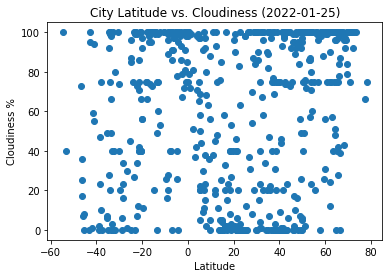

In [105]:
#creating a scatterplot for latitude versus cloudiness
x_values = clean_city_data['Latitude']
y_values = clean_city_data['Cloudiness']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
today = date.today()
plt.title(f'City Latitude vs. Cloudiness ({today})')

#saving the figure as a png
plt.savefig("images/LatvsCloudiness.png")

#showing the figure
plt.show()

Observations about Cloudiness: This plot shows the relation between latitude and cloudiness for the sampled cities. There does not appear to be a relation between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

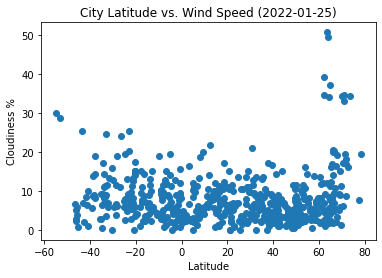

In [106]:
#creating a scatterplot for latitude versus cloudiness
x_values = clean_city_data['Latitude']
y_values = clean_city_data['Wind Speed (mph)']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
today = date.today()
plt.title(f'City Latitude vs. Wind Speed ({today})')

#saving the figure as a png
plt.savefig("images/LatvsWindSpeed.png")

#showing the figure
plt.show()

Observations about wind speed: This plot shows the relation between latitude and wind spped among the sampled cities. There does no appear to be a relation between latitude and wind speed.

## Linear Regression

In [107]:
#creating dataframe for just the northern hemisphere data
north_hem = clean_city_data.loc[clean_city_data["Latitude"] >= 0]

#printing the dataframe
north_hem.head()


,City,Country,Latitude,Longitude,Temperature (F),Max Temp (F),Humidity %,Cloudiness,Wind Speed (mph),Date
1,bethel,US,41.3712,-73.4140,37.83,40.24,71,100,4.00,1643132757
2,saint-francois,FR,46.4154,3.9054,33.24,36.68,93,0,1.14,1643132759
6,bronnoysund,NO,65.4625,12.1997,35.60,35.60,75,75,16.11,1643132526
7,yumen,CN,40.2833,97.2000,17.78,17.78,42,0,2.91,1643132684
8,albany,US,42.6001,-73.9662,30.42,33.75,58,74,1.99,1643132617


In [108]:
#creating dataframe for just the southern hemisphere data
south_hem = clean_city_data.loc[clean_city_data["Latitude"] < 0]

#viewing the dataframe
south_hem.head()

,City,Country,Latitude,Longitude,Temperature (F),Max Temp (F),Humidity %,Cloudiness,Wind Speed (mph),Date
0,henties bay,NA,-22.1160,14.2845,69.85,69.85,80,7,7.25,1643132756
3,ushuaia,AR,-54.8000,-68.3000,42.46,44.22,75,100,29.93,1643132760
4,mar del plata,AR,-38.0023,-57.5575,74.88,82.42,92,75,18.99,1643132758
5,kruisfontein,ZA,-34.0033,24.7314,69.89,69.89,82,99,8.39,1643132763
11,vaini,TO,-21.2000,-175.2000,78.96,78.96,89,40,8.05,1643132770


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [109]:
#computing the regression for temperature versus latitude
#declaring x and y
north_lat = north_hem['Latitude']
north_temp = north_hem['Max Temp (F)']

#performing the regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_temp)

#obtaining regression values
regress_values = north_lat * slope + intercept

#creating the equation string to be printed on the chart
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#printing the line
print(line_eq)

y = -1.37x +92.59


The r-value is: 0.7274789950389424


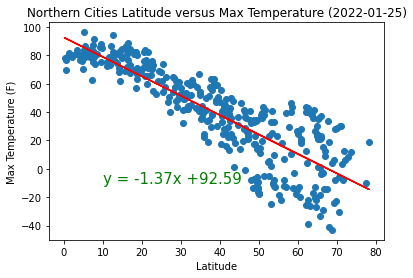

In [110]:
#plotting a scatter plot for the maximum temperature in the northern hemisphere
plt.scatter(north_lat, north_temp)
plt.plot(north_lat,regress_values,"r-")

#label the plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(10,-10), fontsize=15, color = "green")
today = date.today()
plt.title(f'Northern Cities Latitude versus Max Temperature ({today})')

#print r value for the correlation
print(f"The r-value is: {rvalue**2}")
      
#saving the plot as a png
plt.savefig("images/NorthMaxTempvsLat.png")
      
#showing the plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [111]:
#computing the regression for temperature versus latitude
#declaring x and y
south_lat = south_hem['Latitude']
south_temp = south_hem['Max Temp (F)']

#performing the regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_temp)

#obtaining regression values
regress_values = south_lat * slope + intercept

#creating the equation string to be printed on the chart
line_eq = "y = " + str(round(slope,2)) + "x+" + str(round(intercept,2))

#printing the line
print(line_eq)

y = 0.31x+82.8


The r-value is: 0.16739028568426173


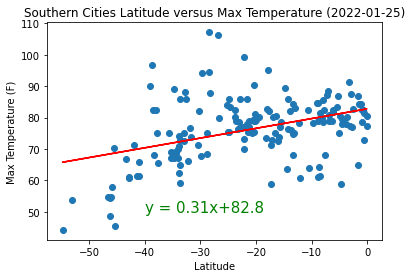

In [112]:
#plotting a scatter plot for the maximum temperature in the northern hemisphere
plt.scatter(south_lat, south_temp)
plt.plot(south_lat,regress_values,"r-")

#label the plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
today = date.today()
plt.title(f'Southern Cities Latitude versus Max Temperature ({today})')
plt.annotate(line_eq,(-40,50), fontsize=15, color = "green")

#print r value for the correlation
print(f"The r-value is: {rvalue**2}")
      
#saving the plot as a png
plt.savefig("images/SouthMaxTempvsLat.png")
      
#showing the plot
plt.show()

Observations About Maximum Temperature:These plots show the relation between latitude and the maximum temperature in the northern and souther hemispheres. The plot for the northern hemisphere reveals there is a fairly strong, positive correlation between latitude and maximum temperature (r2= 0.73), such that the further north the city, the lower the maximum temperature.

By contrast, the relation between latitude and maximum temperature for the southern cities is very weak (r2=0.17), which could suggest there is no relation between latitude and maximum temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [113]:
#computing the regression for humidity versus latitude
#declaring x and y
north_lat = north_hem['Latitude']
north_humid = north_hem['Humidity %']

#performing the regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_humid)

#obtaining regression values
regress_values = north_lat * slope + intercept

#creating the equation string to be printed on the chart
line_eq = "y = " + str(round(slope,2)) + "x+" + str(round(intercept,2))

#printing the line
print(line_eq)

y = 0.58x+50.42


The r-value is: 0.26923185497492


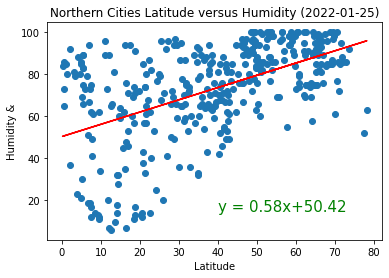

In [114]:
#plotting a scatter plot for humidity and latitude in the northern hemisphere
plt.scatter(north_lat, north_humid)
plt.plot(north_lat,regress_values,"r-")

#label the plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity &')
plt.annotate(line_eq,(40,15), fontsize=15, color = "green")
today = date.today()
plt.title(f'Northern Cities Latitude versus Humidity ({today})')

#print r value for the correlation
print(f"The r-value is: {rvalue**2}")
      
#saving the plot as a png
plt.savefig("images/NorthHumidvsLat.png")
      
#showing the plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [115]:
#computing the regression for humidity versus latitude
#declaring x and y
south_lat = south_hem['Latitude']
south_humid = south_hem['Humidity %']

#performing the regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_humid)

#obtaining regression values
regress_values = south_lat * slope + intercept

#creating the equation string to be printed on the chart
line_eq = "y = " + str(round(slope,2)) + "x+" + str(round(intercept,2))

#printing the line
print(line_eq)

y = 0.17x+76.48


The r-value is: 0.015993859287629687


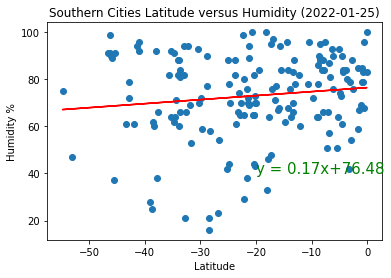

In [116]:
#plotting a scatter plot for humidity and latitude for the southern hemisphere
plt.scatter(south_lat, south_humid)
plt.plot(south_lat,regress_values,"r-")

#label the plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.annotate(line_eq,(-20,40), fontsize=15, color = "green")
today = date.today()
plt.title(f'Southern Cities Latitude versus Humidity ({today})')

#print r value for the correlation
print(f"The r-value is: {rvalue**2}")
      
#saving the plot as a png
plt.savefig("images/SouthHumidvsLat.png")
      
#showing the plot
plt.show()

Observations About Humidity: These scatter plots show the relation between latitude and humidity for the northern and souther hemispheres. For the northern hemisphere, the relation between latitude and humidity is weak (r2 = 0.27), which could suggest no relation. Likewise for the southern hemisphere, the relation between latitude and humidity is also very weak (r2 = 0.02), which could suggest absolutely no relation.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [117]:
#computing the regression for cloudiness versus latitude
#declaring x and y
north_lat = north_hem['Latitude']
north_cloud = north_hem['Cloudiness']

#performing the regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_cloud)

#obtaining regression values
regress_values = north_lat * slope + intercept

#creating the equation string to be printed on the chart
line_eq = "y = " + str(round(slope,2)) + "x+" + str(round(intercept,2))

#printing the line
print(line_eq)

y = 0.65x+33.52


The r-value is: 0.11306681710865693


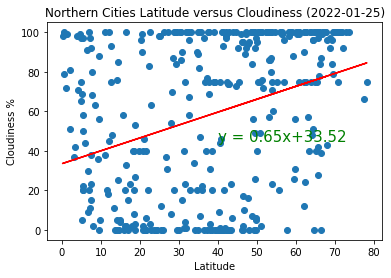

In [118]:
#plotting a scatter plot for cloudiness and latitude for the southern hemisphere
plt.scatter(north_lat, north_cloud)
plt.plot(north_lat,regress_values,"r-")

#label the plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.annotate(line_eq,(40,45), fontsize=15, color = "green")
today = date.today()
plt.title(f'Northern Cities Latitude versus Cloudiness ({today})')

#print r value for the correlation
print(f"The r-value is: {rvalue**2}")
      
#saving the plot as a png
plt.savefig("images/NorthCloudvsLat.png")
      
#showing the plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [119]:
#computing the regression for cloudiness versus latitude
#declaring x and y
south_lat = south_hem['Latitude']
south_cloud = south_hem['Cloudiness']

#performing the regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_cloud)

#obtaining regression values
regress_values = south_lat * slope + intercept

#creating the equation string to be printed on the chart
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#printing the line
print(line_eq)

y = 1.15x +87.24


The r-value is: 0.17937519422134043


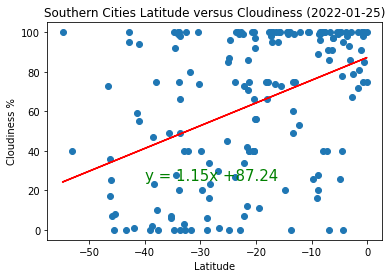

In [120]:
#plotting a scatter plot for cloudiness and latitude for the southern hemisphere
plt.scatter(south_lat, south_cloud)
plt.plot(south_lat,regress_values,"r-")

#label the plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.annotate(line_eq,(-40,25), fontsize=15, color = "green")
today = date.today()
plt.title(f'Southern Cities Latitude versus Cloudiness ({today})')

#print r value for the correlation
print(f"The r-value is: {rvalue**2}")
      
#saving the plot as a png
plt.savefig("images/SouthCloudvsLat.png")
      
#showing the plot
plt.show()

Observations About Cloudiness: These scatter plots show the relation between latitude and cloudiness for the northern and souther hemispheres. For the northern hemisphere, the relation between latitude and cloudiness is weak (r2 = 0.11), which could suggest no relation. Likewise for the southern hemisphere, the relation between latitude and cloudiness is also weak (r2 = 0.18), which could suggest no relation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [121]:
#computing the regression for wind speed versus latitude
#declaring x and y
north_lat = north_hem['Latitude']
north_wind = north_hem['Wind Speed (mph)']

#performing the regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_wind)

#obtaining regression values
regress_values = north_lat * slope + intercept

#creating the equation string to be printed on the chart
line_eq = "y = " + str(round(slope,2)) + "x+" + str(round(intercept,2))

#printing the line
print(line_eq)

y = 0.08x+4.47


The r-value is: 0.056276700213368225


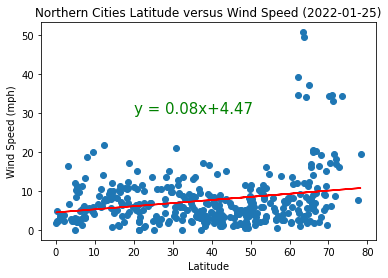

In [122]:
#plotting a scatter plot for wind speed and latitude for the northern hemisphere
plt.scatter(north_lat, north_wind)
plt.plot(north_lat,regress_values,"r-")

#label the plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(20,30), fontsize=15, color = "green")
today = date.today()
plt.title(f'Northern Cities Latitude versus Wind Speed ({today})')

#print r value for the correlation
print(f"The r-value is: {rvalue**2}")
      
#saving the plot as a png
plt.savefig("images/NorthWindvsLat.png")
      
#showing the plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [123]:
#computing the regression for wind speed versus latitude
#declaring x and y
south_lat = south_hem['Latitude']
south_wind = south_hem['Wind Speed (mph)']

#performing the regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_wind)

#obtaining regression values
regress_values = south_lat * slope + intercept

#creating the equation string to be printed on the chart
line_eq = "y = " + str(round(slope,2)) + "x+" + str(round(intercept,2))

#printing the line
print(line_eq)

y = -0.08x+6.91


The r-value is: 0.034778845202787054


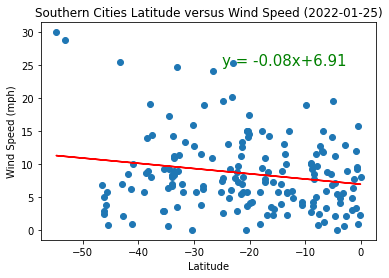

In [124]:
#plotting a scatter plot for wind speed and latitude for the southern hemisphere
plt.scatter(south_lat, south_wind)
plt.plot(south_lat,regress_values,"r-")

#label the plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(-25,25), fontsize=15, color = "green")
today = date.today()
plt.title(f'Southern Cities Latitude versus Wind Speed ({today})')

#print r value for the correlation
print(f"The r-value is: {rvalue**2}")
      
#saving the plot as a png
plt.savefig("images/SouthWindvsLat.png")
      
#showing the plot
plt.show()

Observations about Wind Speed: These scatter plots show the relation between latitude and wind speed for the northern and souther hemispheres. For the northern hemisphere, the relation between latitude and wind speed is weak (r2 = 0.06), which could suggest no relation. Likewise for the southern hemisphere, the relation between latitude and cloudiness is also weak (r2 = 0.03), which could suggest no relation.